In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

In [68]:
# Generate 200 random x values between min and max of x_train
np.random.seed(42)  # For reproducibility
x_random = np.random.uniform(x_train.min(), x_train.max(), 200)

# Interpolate y values from original data
y_interpolated = np.interp(x_random, x_train, y_train)

# Add Gaussian noise to y values (adjust `scale` for noise magnitude)
noise = np.random.normal(loc=0, scale=50, size=200)  # Scale = standard deviation
y_noisy = y_interpolated + noise

# Ensure no negative values (optional, depending on your use case)
y_noisy = np.clip(y_noisy, a_min=0, a_max=None)  # Clip negative values to 0

# Final populated arrays
x_train_populated = x_random
y_train_populated = y_noisy

[]

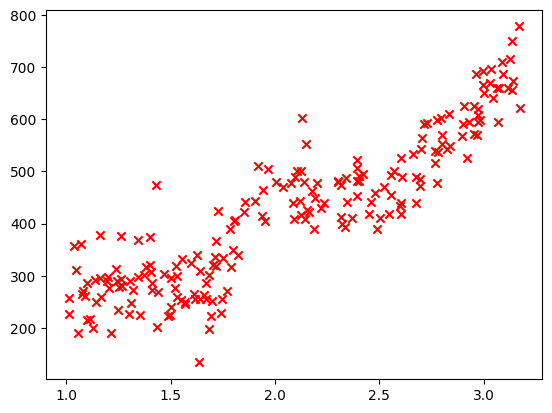

In [69]:
plt.scatter(x_train_populated, y_train_populated, c='r', marker='x')
plt.plot()

In [38]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

In [28]:
def compute_cost(w, b, x, y):
    model_output = compute_model_output(x, w, b)
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        cost = (model_output[i] - y[i]) ** 2
        cost_sum += cost
    total_cost = (1 / (2*m)) * cost_sum
    return total_cost

In [82]:
cost_output = compute_cost(w_final, b_final, x_train_populated, y_train_populated)
print(cost_output)

1883.744550933954


In [33]:
def gradient_function(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [34]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

In [83]:
#initializing model
w_in = int(input("Enter initial value of 'w' : "))
b_in = int(input("Enter initial value of 'b' : "))
no_of_iterations = int(input("Enter no. of iterations : "))
alpha = float(input("Enter learning rate value : "))

w_final, b_final = gradient_descent(x_train_populated, y_train_populated, w_in, b_in, alpha, no_of_iterations)
print("(w, b) found by gradient descent respectively are : ", w_final, b_final)

Enter initial value of 'w' :  0
Enter initial value of 'b' :  0
Enter no. of iterations :  10000
Enter learning rate value :  0.01


(w, b) found by gradient descent respectively are :  197.51588326153163 12.2538839255363


In [84]:
#model result
model_test = compute_model_output(x_train_populated, w_final, b_final)
cost_test = compute_cost(w_final, b_final, x_train_populated, y_train_populated)
print(model_test)
print(cost_test)

[372.52053645 622.8883543  527.8467131  469.9077976  277.56531825
 277.55483722 235.0091263  586.15356947 470.97524466 517.45204454
 218.71444925 631.22948968 571.4951828  302.03853058 288.77906898
 289.46543545 341.97365294 437.79477339 397.46497132 336.31900507
 475.64123003 270.384724   336.71682544 368.96678994 407.94811186
 550.95615895 296.53500277 433.22259966 467.1945982  229.95409464
 473.76923488 283.86845758 238.03695745 622.0936902  629.37062781
 561.04666291 342.13509407 252.2117137  507.09292648 401.03140604
 262.79964463 424.94143768 224.71278126 604.90125643 322.21871179
 497.65885037 345.21912192 435.75749522 447.33448735 290.09548751
 631.08816832 546.59206454 618.01488637 598.60351906 469.5782005
 610.35633552 248.22285154 294.93116917 229.4226046  351.13716398
 378.66363118 327.68040329 569.88517363 364.79155373 331.84562839
 445.59017884 271.00626728 558.35238663 242.1646269  638.6066261
 545.33710413 296.11867457 212.16932004 564.11625266 516.92398293
 526.5488555

[]

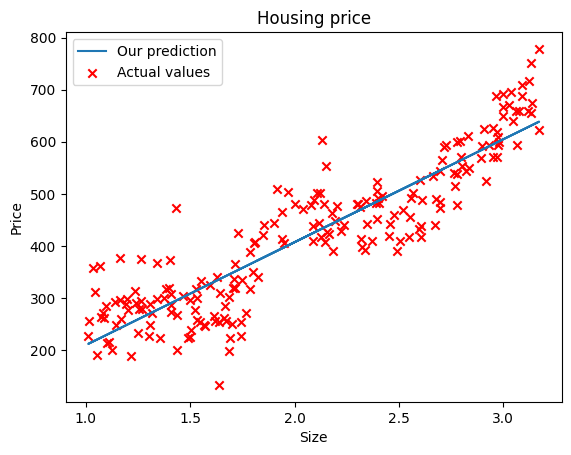

In [85]:
#visulaizing the model
plt.plot(x_train_populated, model_test, label = "Our prediction")
# plt.scatter(x_train_populated, model_test, c = 'g', marker = 'o', label = "Predicted values")
plt.scatter(x_train_populated, y_train_populated, c = 'r', marker = 'x', label = "Actual values")
plt.title("Housing price")
plt.ylabel("Price")
plt.xlabel("Size")
plt.legend()
plt.plot()

In [86]:
#prediction
predict_test_array = np.array([3.6, 1.5])
perform_prediction = compute_model_output(predict_test_array, w_final, b_final)
print(perform_prediction)

[723.31106367 308.52770882]


[]

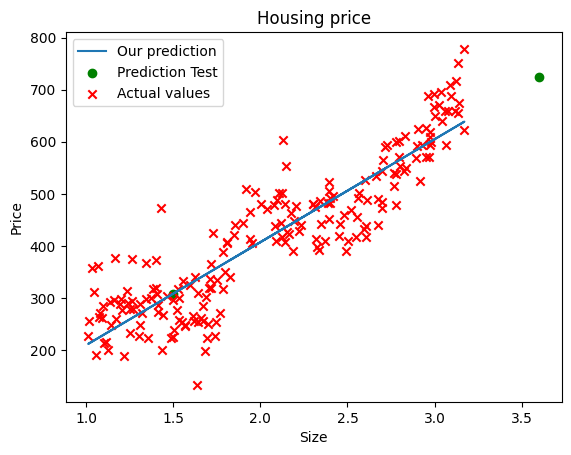

In [87]:
#prediction plot
plt.plot(x_train_populated, model_test, label = "Our prediction")
plt.scatter(predict_test_array, perform_prediction, c = 'g', marker = 'o', label = "Prediction Test")
plt.scatter(x_train_populated, y_train_populated, c = 'r', marker = 'x', label = "Actual values")
plt.title("Housing price")
plt.ylabel("Price")
plt.xlabel("Size")
plt.legend()
plt.plot()